In [1]:
from scipy.sparse import diags
import random
import numpy as np
import scipy as sc
import csv
import scipy.linalg as spl
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from matplotlib import rc
rc('text', usetex=True)
from opt_utils import *
from grad_utils import *
from gen_simulation_data import *
import cv_utils
%matplotlib inline

# Generate synethic data

In [2]:
N = 10 # number of teams
T = 10 # number of seasons/rounds/years
tn_median = 5
bound_games = [tn_median - 0.1,tn_median + 0.1] # bounds for the number of games between each pair of teams

##### tn: list of number of games between each pair of teams
random.seed(0)
np.random.seed(0)
tn = stats.randint.rvs(low = int(bound_games[0]), high = int(bound_games[1]), size = int(T * N * (N - 1) / 2))

### Gaussian Process

In [3]:
[alpha,r] = [0.5,0.5]
##### get beta here #####
random.seed(0)
np.random.seed(0)
beta_gp = beta_gaussian_process(N, T, mu_parameters = [0,1], cov_parameters = [alpha,r], mu_type = 'constant', cov_type = 'toeplitz')
game_matrix_list = get_game_matrix_list(N,T,tn,beta_gp)

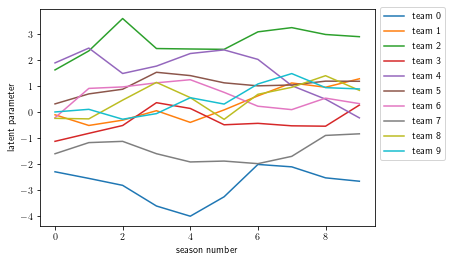

In [4]:
latent = beta_gp
for i in range(N):
    plt.plot(latent[:,i], label="team %d"%i)
plt.xlabel("season number")
plt.ylabel("latent parameter")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1.03, 1, 0))

## Compare results part I

In [5]:
data = game_matrix_list

In [6]:
# true beta
beta_true = beta_gp

Winrate and vanilla BT

In [7]:
# winrate
winrate = np.sum(data, 2)/((N-1)*tn_median)

In [8]:
# vanilla BT
objective_vanilla_bt, beta_vanilla_bt = pgd_l2_sq(data = data,l_penalty = 0)

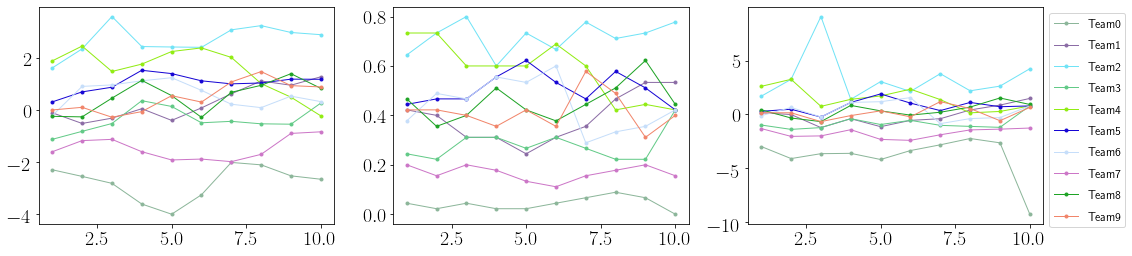

In [9]:
T, N = data.shape[0:2]
f = plt.figure(1, figsize = (18,4))
random.seed(0)
np.random.seed(0)

beta = beta_true.reshape((T,N))
color_matrix = c=np.random.rand(N,3)
ax = plt.subplot(131)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=20)

beta = winrate.reshape((T,N))
ax = plt.subplot(132)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=20)

beta = beta_vanilla_bt.reshape((T,N))
ax = plt.subplot(133)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=20)

# Put a legend to the right of the current axis
ax.legend(loc='upper left', fontsize = 12,labelspacing = 0.7,bbox_to_anchor=(1, 1))

plt.show()
f.savefig("compare1.pdf", bbox_inches='tight')

## Compare results part II

L2 square with CV

In [10]:
random.seed(0)
np.random.seed(0)
lambdas_smooth = np.linspace(0.5, 10.5, 41)
lambda_l2sq_cv, nll_l2sq_cv, beta_l2sq_cv = cv_utils.loocv(data, lambdas_smooth, newton_l2_sq, num_loocv = 400)

1-th cv done
2-th cv done
3-th cv done
4-th cv done
5-th cv done
6-th cv done
7-th cv done
8-th cv done
9-th cv done
10-th cv done
11-th cv done
12-th cv done
13-th cv done
14-th cv done
15-th cv done
16-th cv done
17-th cv done
18-th cv done
19-th cv done
20-th cv done
21-th cv done
22-th cv done
23-th cv done
24-th cv done
25-th cv done
26-th cv done
27-th cv done
28-th cv done
29-th cv done
30-th cv done
31-th cv done
32-th cv done
33-th cv done
34-th cv done
35-th cv done
36-th cv done
37-th cv done
38-th cv done
39-th cv done
40-th cv done
41-th cv done
42-th cv done
43-th cv done
44-th cv done
45-th cv done
46-th cv done
47-th cv done
48-th cv done
49-th cv done
50-th cv done
51-th cv done
52-th cv done
53-th cv done
54-th cv done
55-th cv done
56-th cv done
57-th cv done
58-th cv done
59-th cv done
60-th cv done
61-th cv done
62-th cv done
63-th cv done
64-th cv done
65-th cv done
66-th cv done
67-th cv done
68-th cv done
69-th cv done
70-th cv done
71-th cv done
72-th cv done
7

In [11]:
lambda_l2sq_cv

4.25

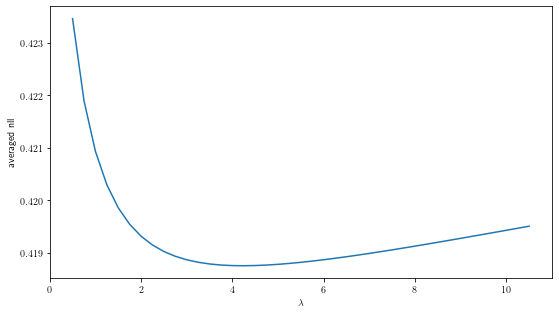

In [12]:
f = plt.figure(1, figsize = (9,5))
plt.plot(lambdas_smooth, nll_l2sq_cv)
plt.xlabel(r'$\lambda$'); plt.ylabel(r"averaged nll")
f.savefig("cv_curve_l2sq.pdf", bbox_inches='tight')

l2 with CV

In [13]:
#DBT l2
objective_admm_l2, beta_admm_l2 = admm_l2(data = data,l_penalty = lambda_l2sq_cv,verbose = True)

# #DBT l2 with CV
# random.seed(0)
# np.random.seed(0)
# lambdas_smooth = np.linspace(1, 10, 41)
# lambda_l2_cv, nll_l2_cv, beta_l2_cv = cv_utils.loocv(data, lambdas_smooth, admm_l2, num_loocv = 400)

initial objective value: 1247.664925
1-th ADMM, objective value: 784.451461
2-th ADMM, objective value: 776.016492
3-th ADMM, objective value: 770.109414
4-th ADMM, objective value: 766.205921
5-th ADMM, objective value: 763.328444
6-th ADMM, objective value: 761.063591
7-th ADMM, objective value: 759.208584
8-th ADMM, objective value: 757.649348
9-th ADMM, objective value: 756.314374
10-th ADMM, objective value: 755.155265
11-th ADMM, objective value: 754.137513
12-th ADMM, objective value: 753.235605
13-th ADMM, objective value: 752.430158
14-th ADMM, objective value: 751.706132
15-th ADMM, objective value: 751.051640
16-th ADMM, objective value: 750.457135
17-th ADMM, objective value: 749.914844
18-th ADMM, objective value: 749.418358
19-th ADMM, objective value: 748.962327
20-th ADMM, objective value: 748.542243
21-th ADMM, objective value: 748.154271
22-th ADMM, objective value: 747.795121
23-th ADMM, objective value: 747.461951
24-th ADMM, objective value: 747.152286
25-th ADMM, 

203-th ADMM, objective value: 741.777549
204-th ADMM, objective value: 741.777289
205-th ADMM, objective value: 741.777037
206-th ADMM, objective value: 741.776792
207-th ADMM, objective value: 741.776556
208-th ADMM, objective value: 741.776326
209-th ADMM, objective value: 741.776103
210-th ADMM, objective value: 741.775887
211-th ADMM, objective value: 741.775678
212-th ADMM, objective value: 741.775475
213-th ADMM, objective value: 741.775278
214-th ADMM, objective value: 741.775087
215-th ADMM, objective value: 741.774902
216-th ADMM, objective value: 741.774722
217-th ADMM, objective value: 741.774548
218-th ADMM, objective value: 741.774379
219-th ADMM, objective value: 741.774215
220-th ADMM, objective value: 741.774056
221-th ADMM, objective value: 741.773902
222-th ADMM, objective value: 741.773752
223-th ADMM, objective value: 741.773607
224-th ADMM, objective value: 741.773467
225-th ADMM, objective value: 741.773330
226-th ADMM, objective value: 741.773198
227-th ADMM, obj

403-th ADMM, objective value: 741.768874
404-th ADMM, objective value: 741.768873
405-th ADMM, objective value: 741.768872
406-th ADMM, objective value: 741.768872
407-th ADMM, objective value: 741.768871
408-th ADMM, objective value: 741.768870
409-th ADMM, objective value: 741.768870
410-th ADMM, objective value: 741.768869
411-th ADMM, objective value: 741.768869
412-th ADMM, objective value: 741.768868
413-th ADMM, objective value: 741.768868
414-th ADMM, objective value: 741.768867
415-th ADMM, objective value: 741.768867
416-th ADMM, objective value: 741.768866
417-th ADMM, objective value: 741.768866
418-th ADMM, objective value: 741.768865
419-th ADMM, objective value: 741.768865
420-th ADMM, objective value: 741.768864
421-th ADMM, objective value: 741.768864
422-th ADMM, objective value: 741.768863
423-th ADMM, objective value: 741.768863
424-th ADMM, objective value: 741.768863
425-th ADMM, objective value: 741.768862
426-th ADMM, objective value: 741.768862
427-th ADMM, obj

614-th ADMM, objective value: 741.768849
615-th ADMM, objective value: 741.768849
616-th ADMM, objective value: 741.768849
617-th ADMM, objective value: 741.768849
618-th ADMM, objective value: 741.768849
619-th ADMM, objective value: 741.768849
620-th ADMM, objective value: 741.768849
621-th ADMM, objective value: 741.768849
622-th ADMM, objective value: 741.768849
623-th ADMM, objective value: 741.768849
624-th ADMM, objective value: 741.768849
625-th ADMM, objective value: 741.768849
626-th ADMM, objective value: 741.768849
627-th ADMM, objective value: 741.768849
628-th ADMM, objective value: 741.768849
629-th ADMM, objective value: 741.768849
630-th ADMM, objective value: 741.768849
631-th ADMM, objective value: 741.768849
632-th ADMM, objective value: 741.768849
633-th ADMM, objective value: 741.768849
634-th ADMM, objective value: 741.768849
635-th ADMM, objective value: 741.768849
636-th ADMM, objective value: 741.768849
637-th ADMM, objective value: 741.768849
638-th ADMM, obj

823-th ADMM, objective value: 741.768849
824-th ADMM, objective value: 741.768849
825-th ADMM, objective value: 741.768849
826-th ADMM, objective value: 741.768849
827-th ADMM, objective value: 741.768849
828-th ADMM, objective value: 741.768849
829-th ADMM, objective value: 741.768849
830-th ADMM, objective value: 741.768849
831-th ADMM, objective value: 741.768849
832-th ADMM, objective value: 741.768849
833-th ADMM, objective value: 741.768849
834-th ADMM, objective value: 741.768849
835-th ADMM, objective value: 741.768849
836-th ADMM, objective value: 741.768849
837-th ADMM, objective value: 741.768849
838-th ADMM, objective value: 741.768849
839-th ADMM, objective value: 741.768849
840-th ADMM, objective value: 741.768849
841-th ADMM, objective value: 741.768849
842-th ADMM, objective value: 741.768849
843-th ADMM, objective value: 741.768849
844-th ADMM, objective value: 741.768849
845-th ADMM, objective value: 741.768849
846-th ADMM, objective value: 741.768849
847-th ADMM, obj

l1 with CV

In [14]:
#DBT l1
objective_admm_l1, beta_admm_l1 = admm_l1(data = data,l_penalty = lambda_l2sq_cv, verbose = True)

# #DBT l1 with CV
# random.seed(0)
# np.random.seed(0)
# lambdas_smooth = np.linspace(1, 10, 41)
# lambda_l1_cv, nll_l1_cv, beta_l1_cv = cv_utils.loocv(data, lambdas_smooth, admm_l1, num_loocv = 400)

initial objective value: 1247.664925
1-th ADMM, objective value: 786.176347
2-th ADMM, objective value: 793.266952
Converged!


Draw the figure

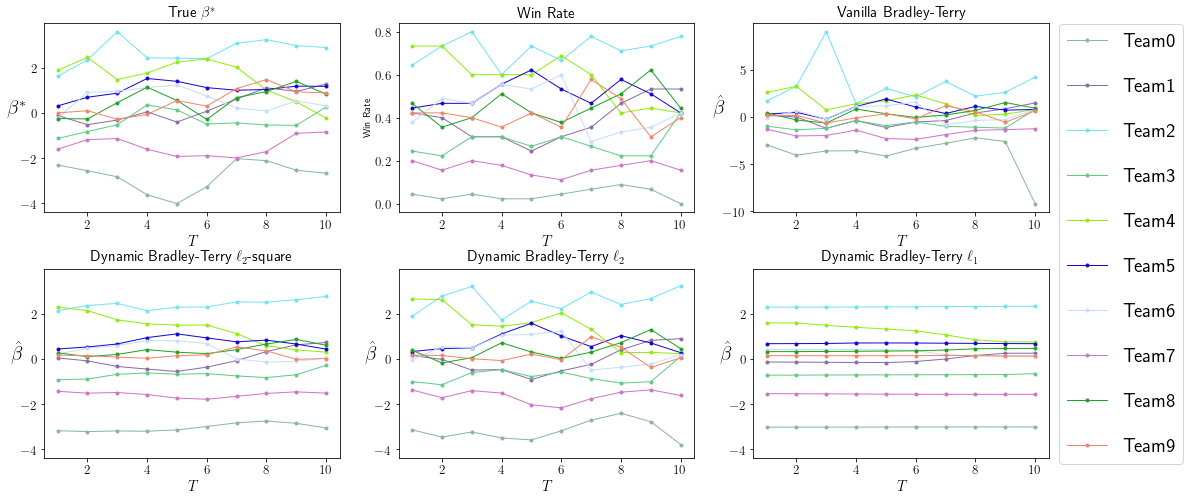

In [22]:
T, N = data.shape[0:2]
f = plt.figure(1, figsize = (18,8))

size_ylabel = 20
size_xlabel = 15
size_title = 15
size_tick = 13
size_legend = 20
font_title = "Times New Roman Bold"

random.seed(0)
np.random.seed(0)
color_matrix = c=np.random.rand(N,3)

beta = beta_true.reshape((T,N))
ax = plt.subplot(231)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"True $\beta^*$",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"${\beta}^*$",fontsize = size_ylabel,rotation = "horizontal")
    bottom, top = plt.ylim()
    
beta = winrate.reshape((T,N))
ax = plt.subplot(232)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Win Rate",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"Win Rate",fontsize = 10,rotation = "vertical")
    
beta = beta_vanilla_bt.reshape((T,N))
ax = plt.subplot(233)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Vanilla Bradley-Terry",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
    
    
ax.legend(loc='upper left', fontsize = size_legend,labelspacing = 1.3,bbox_to_anchor=(1, 1.05))


beta = beta_l2sq_cv.reshape((T,N))
ax = plt.subplot(234)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Dynamic Bradley-Terry $\ell_2$-square",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
    plt.ylim((bottom, top))
    
beta = beta_admm_l2.reshape((T,N))
# beta = beta_l2_cv.reshape((T,N))
ax = plt.subplot(235)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Dynamic Bradley-Terry $\ell_2$",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
    plt.ylim((bottom, top))
    
beta = beta_admm_l1.reshape((T,N))
# beta = beta_l1_cv.reshape((T,N))
ax = plt.subplot(236)
for i in range(N):
    ax.plot(range(1,T + 1),beta[:,i],c=color_matrix[i,:],marker = '.',label = 'Team' + str(i),linewidth=1)
    ax.tick_params(axis='both', which='major', labelsize=size_tick)
    plt.title(r"Dynamic Bradley-Terry $\ell_1$",fontsize = size_title)
    plt.xlabel(r"$T$",fontsize = size_xlabel); plt.ylabel(r"$\hat{\beta}$",fontsize = size_ylabel,rotation = "horizontal")
    plt.ylim((bottom, top))
    
plt.subplots_adjust(hspace = 0.3)
plt.show()
f.savefig("compare.pdf", bbox_inches='tight')

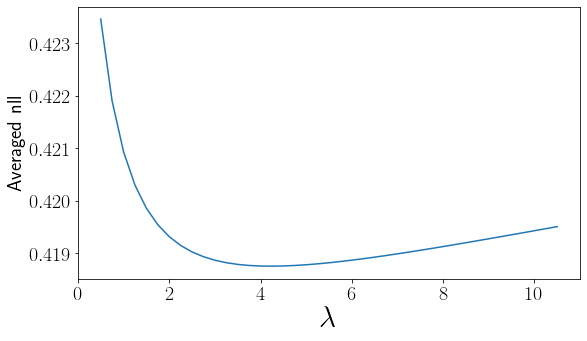

In [21]:
f = plt.figure(1, figsize = (9,5))
size_ylabel = 20
size_xlabel = 30
size_tick = 20

nll_cv = nll_l2sq_cv
plt.plot(lambdas_smooth, nll_cv)
plt.xlabel(r'$\lambda$',fontsize = size_xlabel); plt.ylabel(r"Averaged nll",fontsize = size_ylabel)
plt.tick_params(axis='both', which='major', labelsize=size_tick)

f.savefig("cv_curve.pdf", bbox_inches='tight')